<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Valida%C3%A7%C3%A3o_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação de Dados - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [2]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [3]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSxWQwAR09260h9mAV3KHutIf9FR6eJwAken8Nd5isdO2cR0U95le7sek7o-9g7jIG4SWDpiD4fxvq6/pub?gid=240147958&single=true&output=csv'


In [4]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,date,customer_id,total_value,nfe,business_id
0,77407950,2023-11-17 22:30:58.000,8491804.0,93.90,31147466000148133071,4136
1,77407961,2023-11-17 22:33:18.000,NaN,49.80,31147466000148133072,4136
2,77407964,2023-11-17 22:33:35.000,8491987.0,73.70,31147466000148133073,4136
3,77407965,2023-11-17 22:43:03.000,8401108.0,45.70,31147466000148133074,4136
4,77407966,2023-11-17 23:02:10.000,8401130.0,48.70,31147466000148133075,4136
5,77407967,2023-11-17 23:03:03.000,NaN,0.02,31147466000148133076,4136
6,77407968,2023-11-17 23:05:18.000,8336234.0,48.90,31147466000148133077,4136
7,77407969,2023-11-17 23:20:17.000,8776879.0,58.00,31147466000148133078,4136
8,77407970,2023-11-17 23:22:01.000,NaN,38.80,31147466000148133079,4136
9,77135214,2023-11-12 11:38:54.000,8988240.0,37.20,3449955600019694568,4137


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [5]:
# Mostra as dimensões do dataset
dataset.shape

(254056, 6)

In [6]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254056 entries, 0 to 254055
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           254056 non-null  int64  
 1   date         254056 non-null  object 
 2   customer_id  133697 non-null  float64
 3   total_value  254056 non-null  float64
 4   nfe          254056 non-null  object 
 5   business_id  254056 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 11.6+ MB


Inicialmente, podemos observar que existem 254.056 entradas e 6 atributos. Além disso, podemos identifcar que nenhum atributo tem valores nulos, excetos as vendas sem o CPF na nota, portanto, sem client_id.

---



In [7]:
# Verifica a distribuição de vendas unidade
dataset.groupby('business_id').size()

business_id
3942    27221
4062    38082
4063    21178
4064    15628
4065    47790
4134    12366
4135     6275
4136    16245
4137    12919
4138     8662
4139     8157
4140     8236
4229    21013
4255    10284
dtype: int64

Com essa análise, podemos observar que a unidade que mais tem vendas é 4065 - indicando uma movimentação de vendas bem acima da média. De outro modo, a unidade 4135 é a que tem menor movimentação.

O código abaixo exibe as estatísticas descritivas do dataset de vendas.

In [8]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,customer_id,total_value,business_id
count,2.540560e+05,1.336970e+05,254056.000000,254056.000000
mean,6.597796e+07,7.472528e+06,45.386344,4092.983555
std,7.719240e+06,9.987407e+05,42.126969,77.486387
min,5.283729e+07,6.067546e+06,-12.000000,3942.000000
25%,5.804719e+07,6.657324e+06,20.300000,4062.000000
50%,6.753681e+07,7.040440e+06,36.000000,4065.000000
75%,7.534304e+07,8.385997e+06,57.100000,4137.000000
max,7.742200e+07,9.012635e+06,6609.600000,4255.000000


Aqui, para essa análise, a única informação útil são as informações de Total_value, em que indica que o ticket médio por venda é de 45,38 reais, o máximo observado na compra de um produto é de 6609 reais. Além disso, nesse atributo existem valores negativos.

Agora, vamos exibir o gráfico boxplot para entender como está distribuído o atributo Total_valeu, com o objetivo de identificar se existe alguma venda com valor negativo.

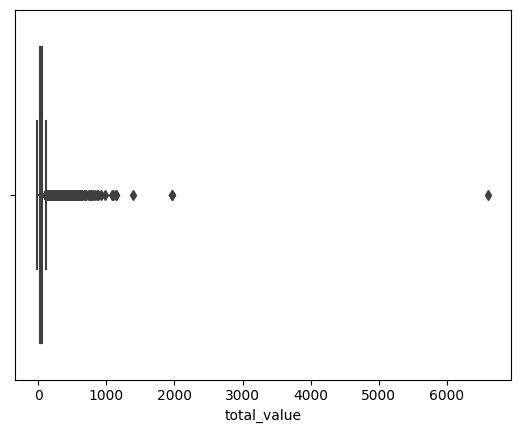

In [9]:
# boxplot com seaborn de Total_valeu
sns.boxplot(x=dataset['total_value']);

O gráfico acima indica que existem alguns problemas com o atributo 'total_valeu'. Nele, podemos identificar que existem vendas negativas e algumas vendas com o valor que se destaca - acima de 3 desvios padrão.
Agora, vamos verificar os nulls do dataset original.

In [10]:
# verificando nulls no dataset
dataset.isnull().sum()

id                  0
date                0
customer_id    120359
total_value         0
nfe                 0
business_id         0
dtype: int64

Aqui, podemos observar que existem 120.359 compras sem CPF na nota, ou seja, sem estarem vinculadas à customer_id.


Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

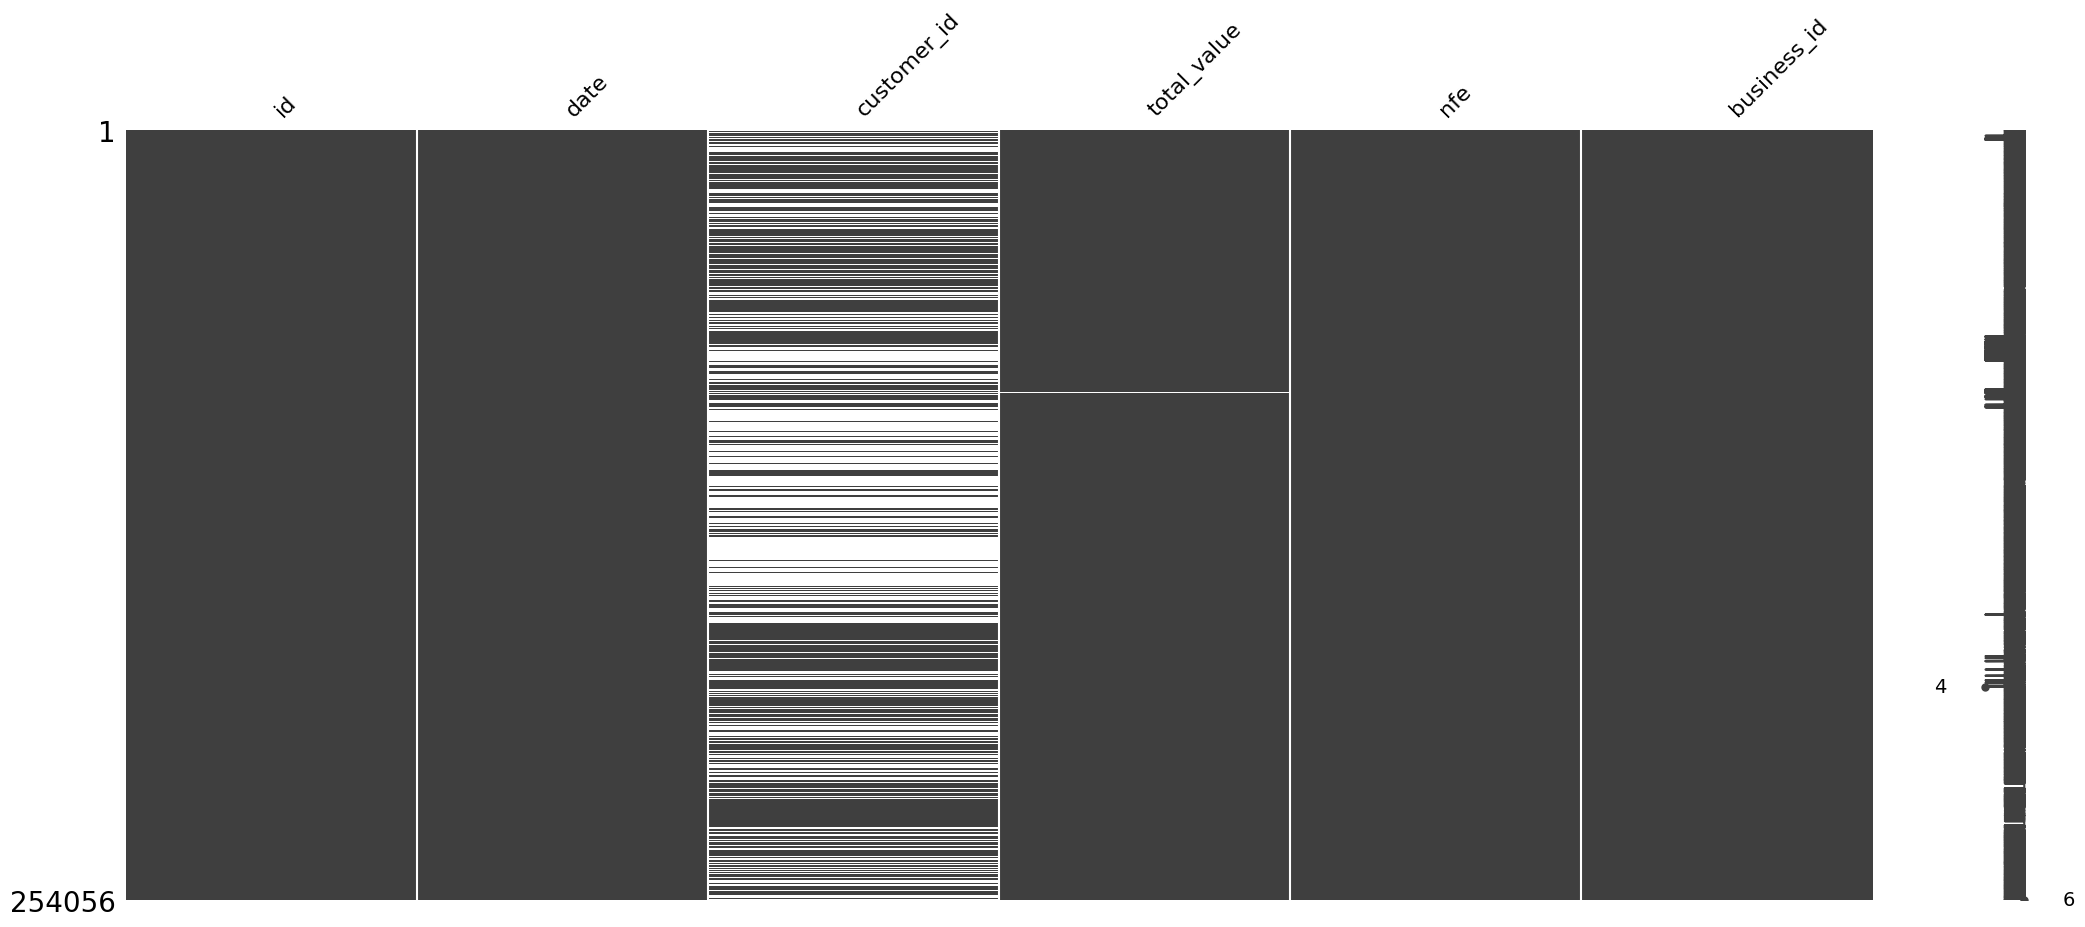

In [11]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

Com essa visualização, podemos observar que existem valores agora considerados nulo no Dataset transformado. Com isso, podemos concluir que, aqui, existem vendas negativas e vendas com o valor zero.


In [12]:
# verificando nulls no dataset
crek.isnull().sum()

id                  0
date                0
customer_id    120359
total_value       204
nfe                 0
business_id         0
dtype: int64

Com esse novo dataset, vamos verificar como se comportam as novas estatísticas descritvas.



In [13]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
crek.describe()

,id,customer_id,total_value,business_id
count,2.540560e+05,1.336970e+05,253852.000000,254056.000000
mean,6.597796e+07,7.472528e+06,45.422817,4092.983555
std,7.719240e+06,9.987407e+05,42.124233,77.486387
min,5.283729e+07,6.067546e+06,-12.000000,3942.000000
25%,5.804719e+07,6.657324e+06,20.400000,4062.000000
50%,6.753681e+07,7.040440e+06,36.000000,4065.000000
75%,7.534304e+07,8.385997e+06,57.100000,4137.000000
max,7.742200e+07,9.012635e+06,6609.600000,4255.000000


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

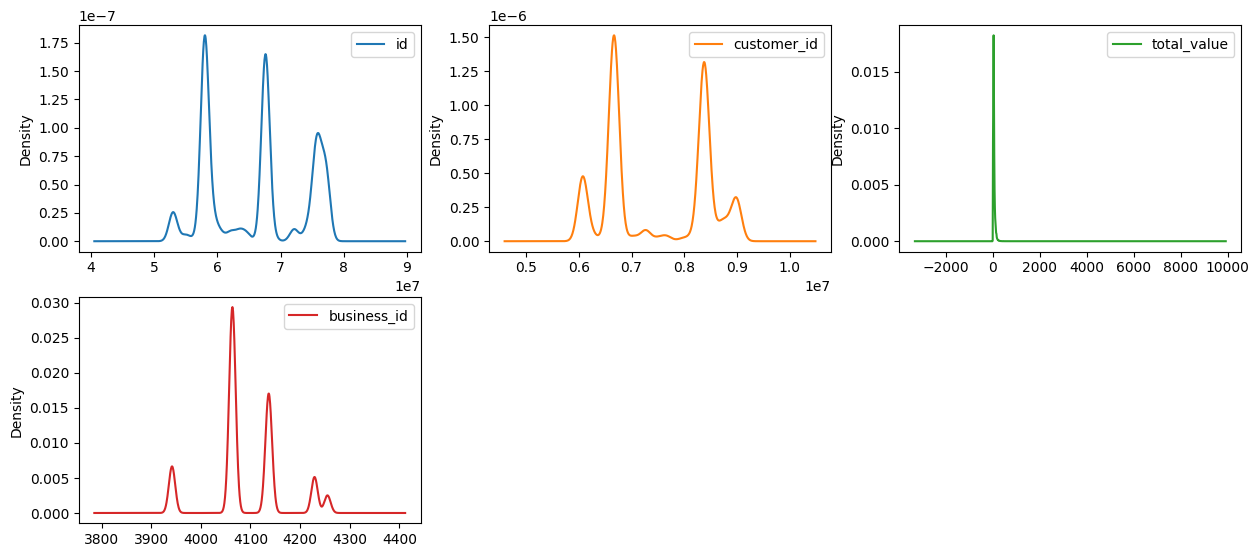

In [14]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

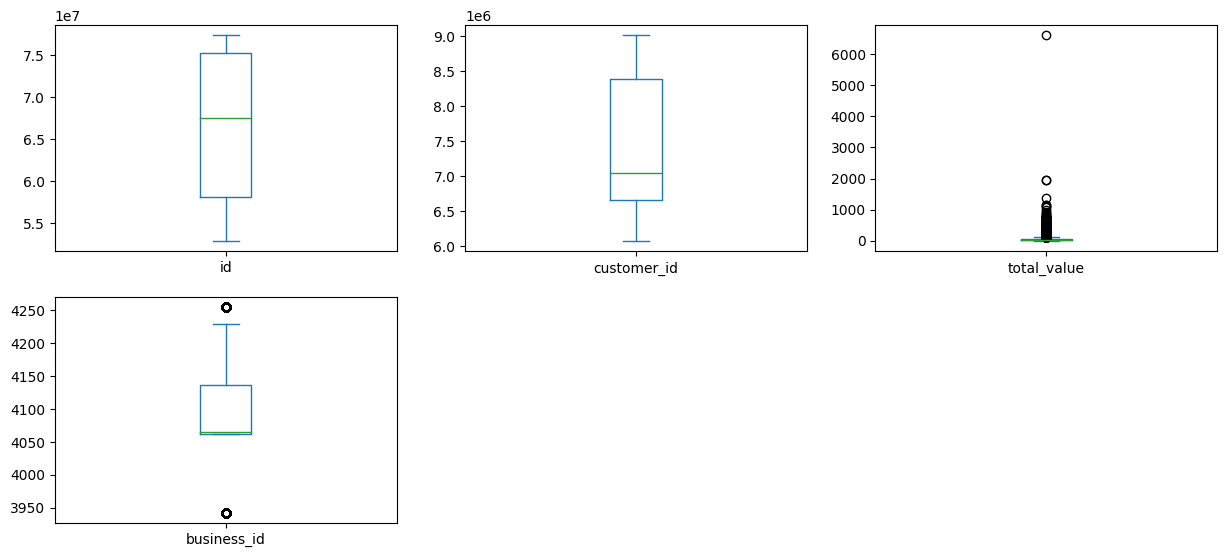

In [15]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir do gráfico de desindade, temos uma outra visualização no problema de vendas negativas do dataset. Além disso, algumas vendas se destacam, mostrando que pode haver erros para cima também.
